In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.EnKF.util import generate_observation_matrix, generate_observation_points

num_data_point = 100
num_mesh = 50

lin = np.linspace(0, 1.0, num_mesh)
X_mesh, Y_mesh = np.meshgrid(lin, lin)

H, obs_indice = generate_observation_matrix(num_mesh, num_data_point, True)
x_obs, y_obs = generate_observation_points(obs_indice, X_mesh, Y_mesh)

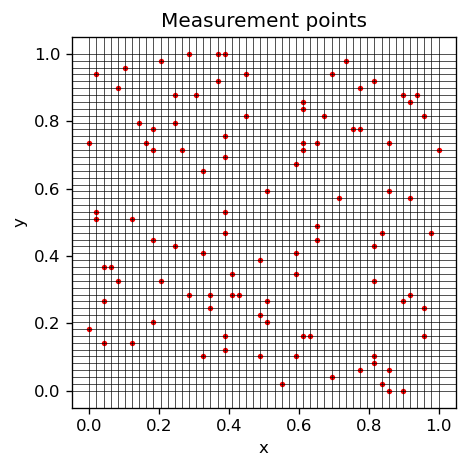

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), facecolor="white", dpi=120)

ax.set_xlabel("x")
ax.set_ylabel("y")

for x in lin:
    ax.axhline(x, 0, 1, linewidth = 0.4, color="k")  # horizontal lines
    ax.axvline(x, 0, 1, linewidth = 0.4, color="k")  # vertical lines

ax.scatter(x_obs, y_obs, c="r", s=5.0)
ax.set_title("Measurement points")

fig.tight_layout()

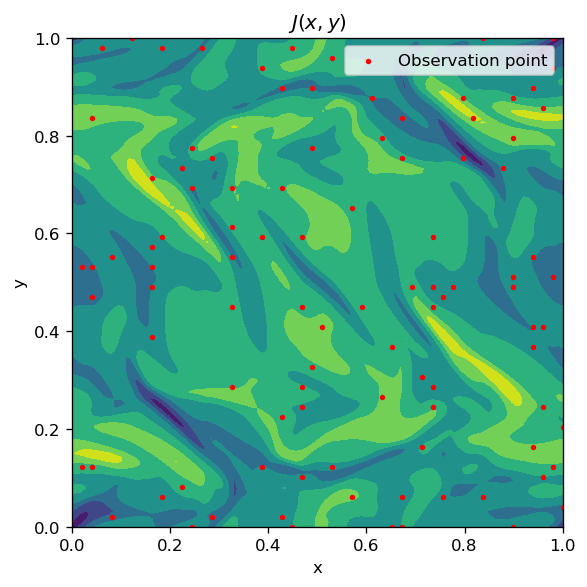

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="white", dpi=120)

lin = np.linspace(0, 1.0, 128)
X_mesh_sim, Y_mesh_sim = np.meshgrid(lin, lin)

data = np.load("./data/J.npy")
ax.contourf(X_mesh_sim, Y_mesh_sim, data)
ax.scatter(x_obs, y_obs, c="r", s = 5.0, label = "Observation point")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$J(x,y)$")
ax.legend(loc = "upper right")

fig.tight_layout()

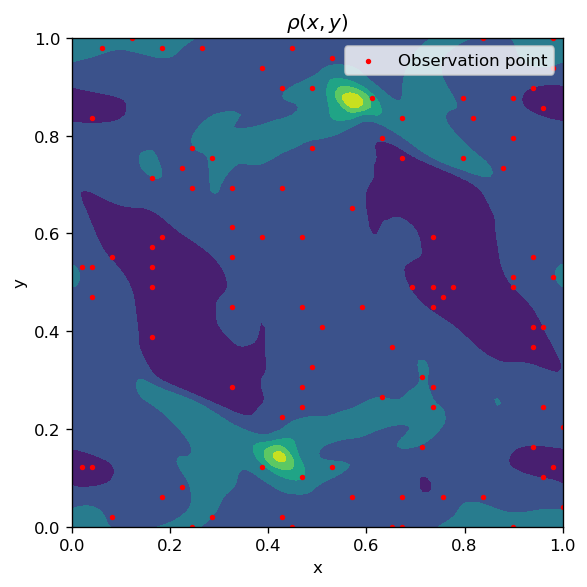

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="white", dpi=120)

lin = np.linspace(0, 1.0, 128)
X_mesh_sim, Y_mesh_sim = np.meshgrid(lin, lin)

data = np.load("./data/rho.npy")
ax.contourf(X_mesh_sim, Y_mesh_sim, data)
ax.scatter(x_obs, y_obs, c="r", s=5.0, label="Observation point")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$\rho(x,y)$")
ax.legend(loc="upper right")

fig.tight_layout()

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$\\rho(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$\\rho(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

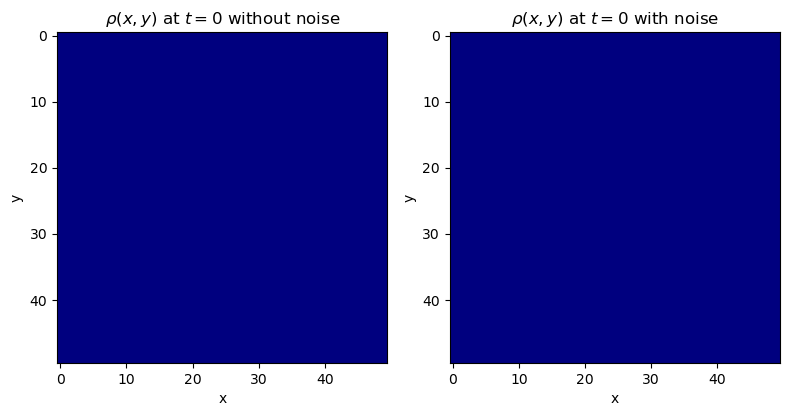

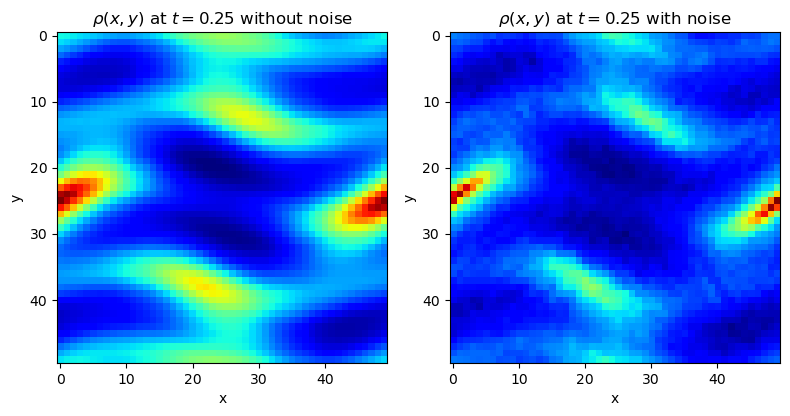

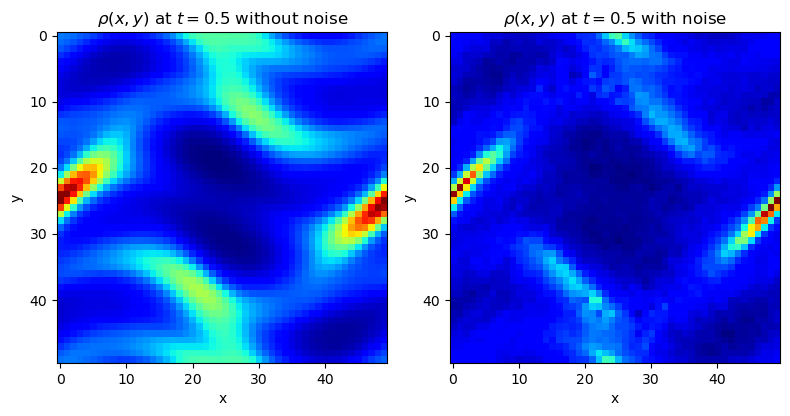

In [16]:
from src.env.util import generate_comparison_snapshot

rho_measure = np.load("./data/rho/np_100_ne_100_sx_0.01_sz_0.01/density_measure.npy")
rho_estimate = np.load("./data/rho/np_100_ne_100_sx_0.01_sz_0.01/density_estimate.npy")

T = rho_estimate.shape[-1]

generate_comparison_snapshot(rho_measure[:,:,0], rho_estimate[:,:,0], "results/temp", "rho_comparison_init.png", r"$\rho(x,y)$ at $t=0$")
generate_comparison_snapshot(rho_measure[:,:,T//2], rho_estimate[:,:,T//2], "results/temp", "rho_comparison_mid.png", r"$\rho(x,y)$ at $t=0.25$")
generate_comparison_snapshot(rho_measure[:,:,-1], rho_estimate[:,:,-1], "results/temp", "rho_comparison.png", r"$\rho(x,y)$ at $t=0.5$")

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$P(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$P(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

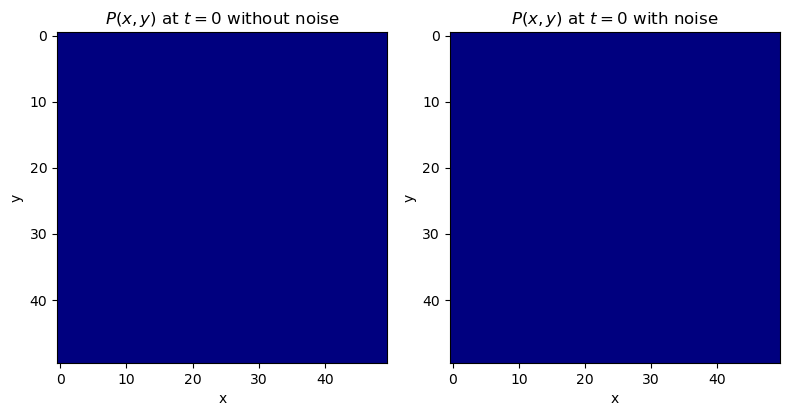

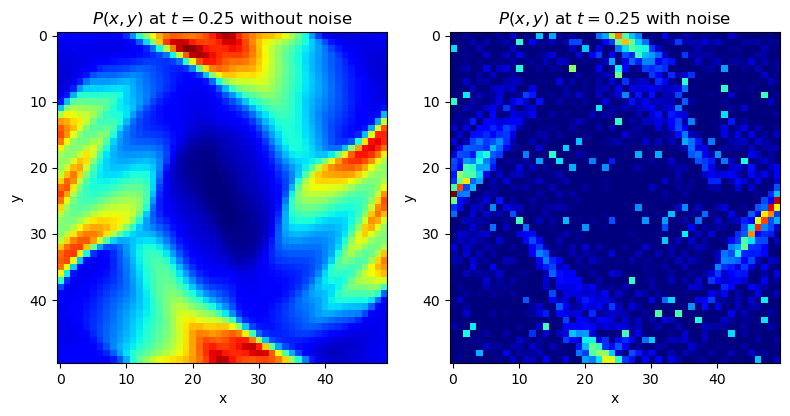

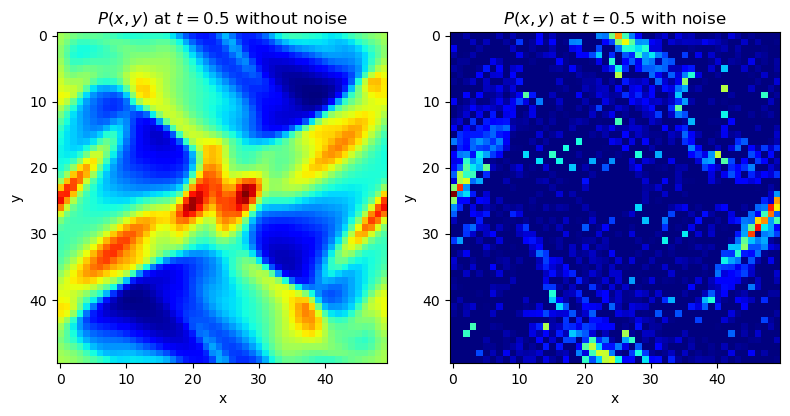

In [17]:
from src.env.util import generate_comparison_snapshot

measure = np.load("./data/P/np_100_ne_100_sx_0.01_sz_0.01/pressure_measure.npy")
estimate = np.load("./data/P/np_100_ne_100_sx_0.01_sz_0.01/pressure_estimate.npy")

T = estimate.shape[-1]

generate_comparison_snapshot(measure[:,:,0], estimate[:,:,0], "results/temp", "pressure_comparison_init.png", r"$P(x,y)$ at $t=0$")
generate_comparison_snapshot(measure[:,:,T//2], estimate[:,:,T//2], "results/temp", "pressure_comparison_mid.png", r"$P(x,y)$ at $t=0.25$")
generate_comparison_snapshot(measure[:,:,-1], estimate[:,:,-1], "results/temp", "pressure_comparison.png", r"$P(x,y)$ at $t=0.5$")

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$v_x(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$v_x(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

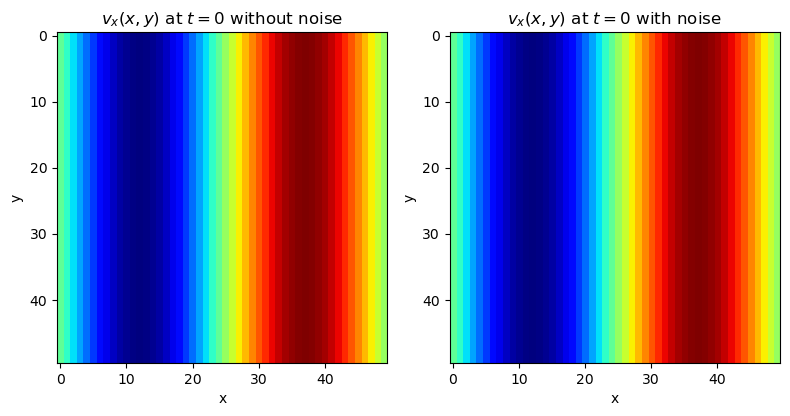

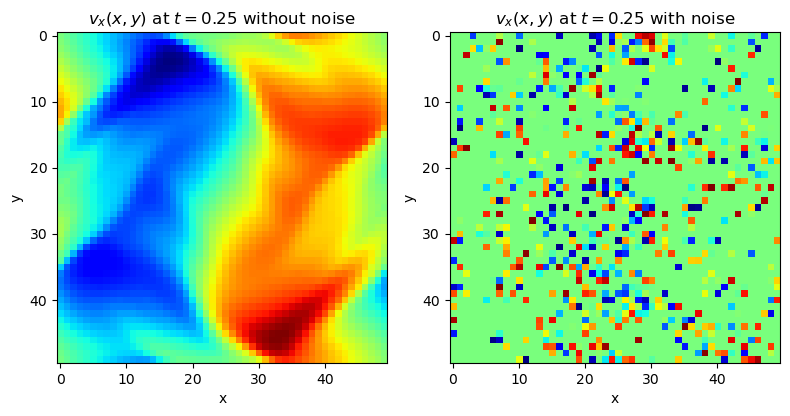

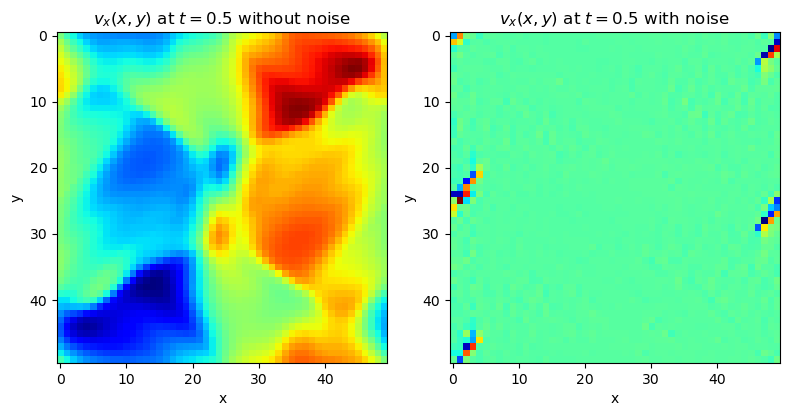

In [26]:
from src.env.util import generate_comparison_snapshot

measure = np.load("./data/v/np_100_ne_100_sx_0.0001_sz_0.0001/vx_measure.npy")
estimate = np.load("./data/v/np_100_ne_100_sx_0.0001_sz_0.0001/vx_estimate.npy")

T = estimate.shape[-1]

generate_comparison_snapshot(measure[:,:,0], estimate[:,:,0], "results/temp", "vx_comparison_init.png", r"$v_x(x,y)$ at $t=0$")
generate_comparison_snapshot(measure[:,:,T//2], estimate[:,:,T//2], "results/temp", "vx_comparison_mid.png", r"$v_x(x,y)$ at $t=0.25$")
generate_comparison_snapshot(measure[:,:,-1], estimate[:,:,-1], "results/temp", "vx_comparison.png", r"$v_x(x,y)$ at $t=0.5$")

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$v_y(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$v_y(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

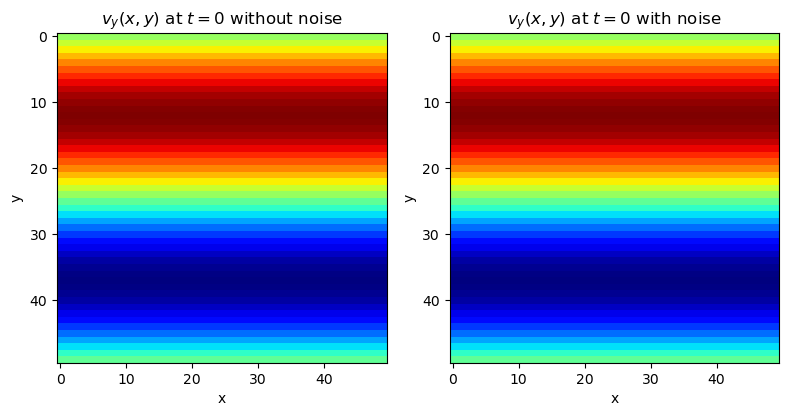

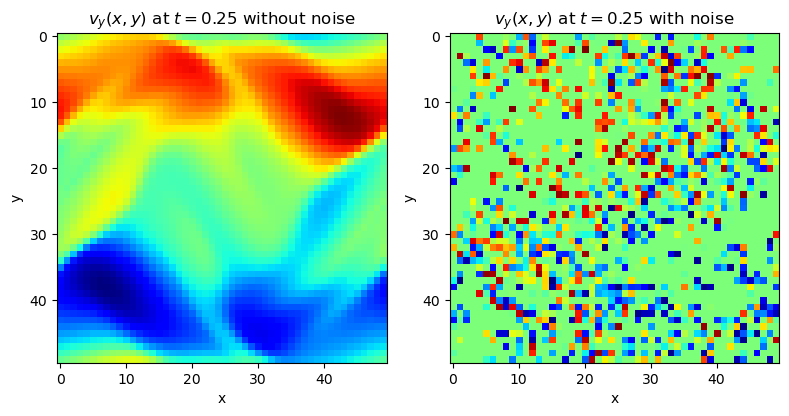

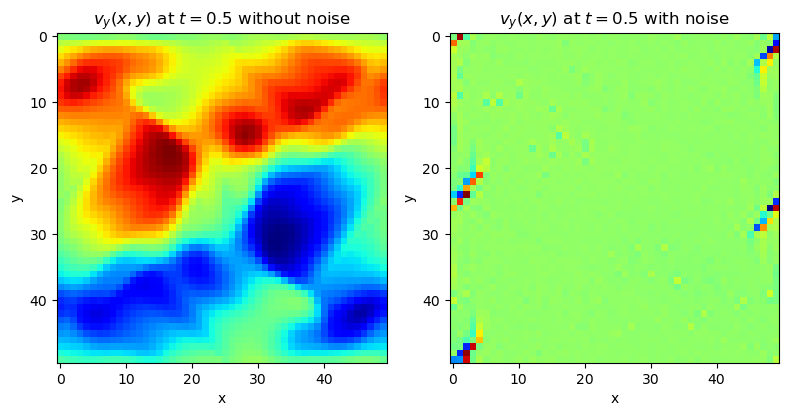

In [19]:
from src.env.util import generate_comparison_snapshot

measure = np.load("./data/v/np_100_ne_100_sx_0.01_sz_0.01/vy_measure.npy")
estimate = np.load("./data/v/np_100_ne_100_sx_0.01_sz_0.01/vy_estimate.npy")

T = estimate.shape[-1]

generate_comparison_snapshot(measure[:,:,0], estimate[:,:,0], "results/temp", "vy_comparison_init.png", r"$v_y(x,y)$ at $t=0$")
generate_comparison_snapshot(measure[:,:,T//2], estimate[:,:,T//2], "results/temp", "vy_comparison_mid.png", r"$v_y(x,y)$ at $t=0.25$")
generate_comparison_snapshot(measure[:,:,-1], estimate[:,:,-1], "results/temp", "vy_comparison.png", r"$v_y(x,y)$ at $t=0.5$")

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$B_x(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$B_x(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

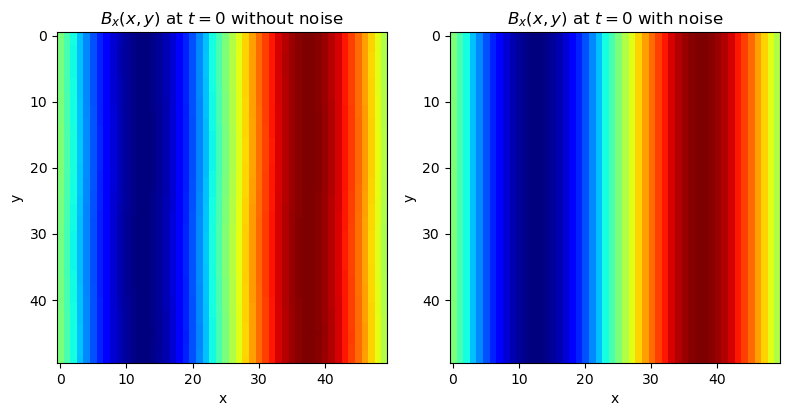

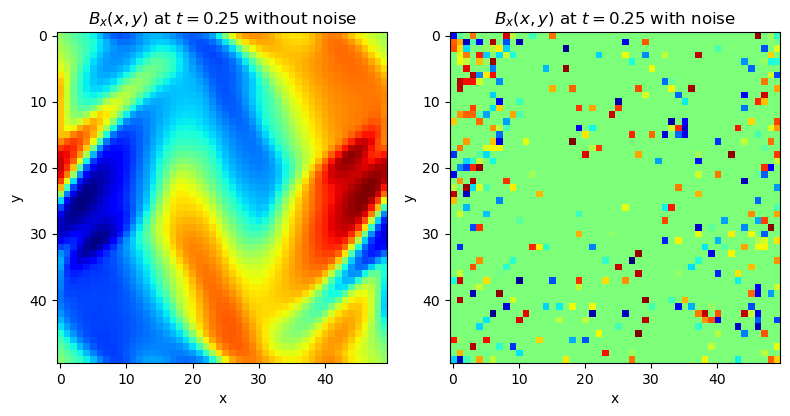

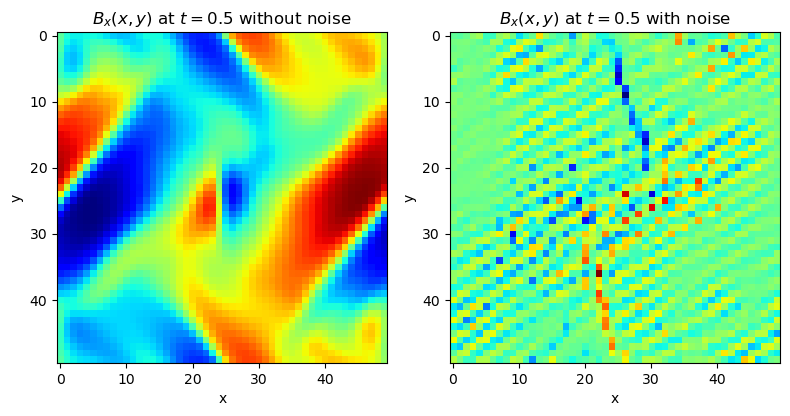

In [20]:
from src.env.util import generate_comparison_snapshot

measure = np.load("./data/B/np_100_ne_100_sx_0.01_sz_0.01/Bx_measure.npy")
estimate = np.load("./data/B/np_100_ne_100_sx_0.01_sz_0.01/Bx_estimate.npy")

T = estimate.shape[-1]

generate_comparison_snapshot(measure[:,:,0], estimate[:,:,0], "results/temp", "Bx_comparison_init.png", r"$B_x(x,y)$ at $t=0$")
generate_comparison_snapshot(measure[:,:,T//2], estimate[:,:,T//2], "results/temp", "Bx_comparison_mid.png", r"$B_x(x,y)$ at $t=0.25$")
generate_comparison_snapshot(measure[:,:,-1], estimate[:,:,-1], "results/temp", "Bx_comparison.png", r"$B_x(x,y)$ at $t=0.5$")

(<Figure size 800x400 with 2 Axes>,
 array([<Axes: title={'center': '$B_y(x,y)$ at $t=0.5$ without noise'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': '$B_y(x,y)$ at $t=0.5$ with noise'}, xlabel='x', ylabel='y'>],
       dtype=object))

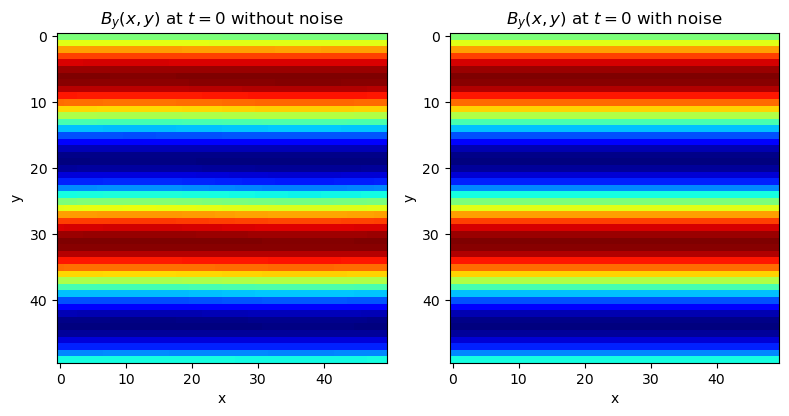

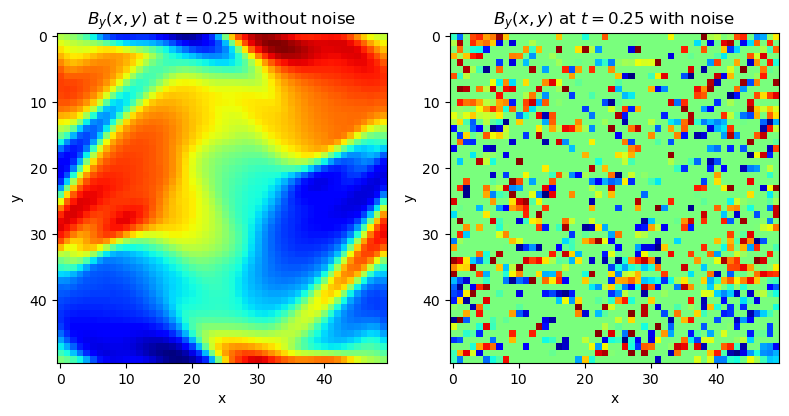

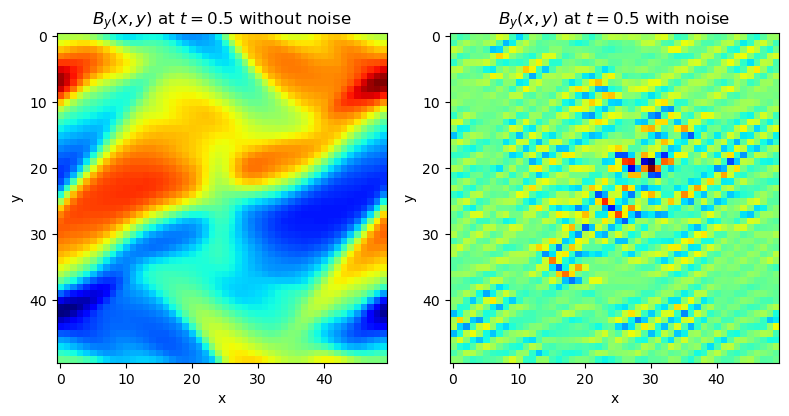

In [27]:
from src.env.util import generate_comparison_snapshot

measure = np.load("./data/B/np_100_ne_100_sx_0.0001_sz_0.0001/By_measure.npy")
estimate = np.load("./data/B/np_100_ne_100_sx_0.0001_sz_0.0001/By_estimate.npy")

T = estimate.shape[-1]

generate_comparison_snapshot(measure[:,:,0], estimate[:,:,0], "results/temp", "By_comparison_init.png", r"$B_y(x,y)$ at $t=0$")
generate_comparison_snapshot(measure[:,:,T//2], estimate[:,:,T//2], "results/temp", "By_comparison_mid.png", r"$B_y(x,y)$ at $t=0.25$")
generate_comparison_snapshot(measure[:,:,-1], estimate[:,:,-1], "results/temp", "By_comparison.png", r"$B_y(x,y)$ at $t=0.5$")